In [1]:
import shutil
from glob import glob
from tqdm import tqdm

import cv2
import dlib
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the directories where the data are in
live_images = glob('PATH TO THE DIRECTORY WITH IMAGES OF ALIVE PEOPLE/*')
live_images += glob('PATH TO ANOTHER DIRECTORY WITH IMAGES OF ALIVE PEOPLE/*')
spoof_images = glob('PATH TO THE DIRECTORY WITH IMAGES OF SPOOFING ATTACKS/*')

print(f'{len(live_images)} images of live people')
print(f'{len(spoof_images)} images of spoofs')

164514 images of live people
329921 images of spoofs


In [3]:
test_live_images = glob('celeba-spoof-for-face-antispoofing/CelebA_Spoof_/CelebA_Spoof/Data/test/*/live/*.png')
test_spoof_images = glob('celeba-spoof-for-face-antispoofing/CelebA_Spoof_/CelebA_Spoof/Data/test/*/spoof/*.png')

print(f'{len(test_live_images)} images of live people for testing')
print(f'{len(test_spoof_images)} images of spoofs for testing')

19923 images of live people for testing
47247 images of spoofs for testing


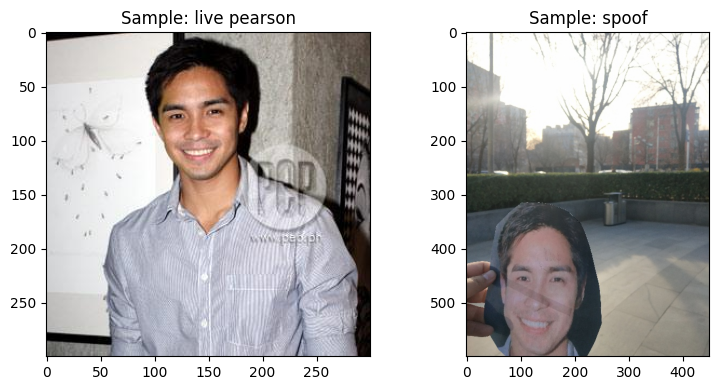

In [4]:
# Visualization of one pair of images from the dataset
sample_live_image = plt.imread(live_images[18])
sample_spoof_image = plt.imread(spoof_images[2])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Sample: live pearson')
plt.imshow(sample_live_image)
plt.subplot(1,2,2)
plt.title('Sample: spoof')
plt.imshow(sample_spoof_image)
plt.tight_layout();

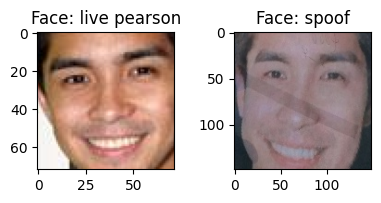

In [5]:
# Test the face crop
dlib_face_detector = dlib.get_frontal_face_detector()

# Function to crop the face in one image
def detect_face(image, hog_face_detector):
  height, width, _ = image.shape
  imgGRAY = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  results = hog_face_detector(imgGRAY, 0)
  for bbox in results:
    x1 = bbox.left()
    y1 = bbox.top()
    x2 = bbox.right()
    y2 = bbox.bottom()
    
    return image[y1:y2,x1:x2]

# Visualization of a pair of images after the face cropping
face_live = detect_face(sample_live_image, dlib_face_detector)
face_spoof = detect_face(sample_spoof_image, dlib_face_detector)

plt.figure(figsize=(4,2))
plt.subplot(1,2,1)
plt.title('Face: live pearson')
plt.imshow(face_live)
plt.subplot(1,2,2)
plt.title('Face: spoof')
plt.imshow(face_spoof)
plt.tight_layout();

In [8]:
# Prepare the dataset with cropped images
!rm -rf faces2/
!mkdir faces2/
!mkdir faces2/train/
!mkdir faces2/train/live/
!mkdir faces2/train/spoof/
!mkdir faces2/test/
!mkdir faces2/test/live/
!mkdir faces2/test/spoof/

train_live_dir = 'faces2/train/live/'
train_spoof_dir = 'faces2/train/spoof/'

# Fill the train dataset
N_train = 400000
for i in tqdm(range(N_train), ncols=80):
  try:
    if 'img_align' in live_images[i]:
      shutil.copyfile(live_images[i], train_live_dir + f'image_{str(i + 1).zfill(6)}.jpg')
    else:
      image = plt.imread(live_images[i])
      face = detect_face(image, dlib_face_detector)
      plt.imsave(train_live_dir + f'image_{str(i + 1).zfill(6)}.jpg', face)
  except:
    pass
  
  try:
    image = plt.imread(spoof_images[i])
    face = detect_face(image, dlib_face_detector)
    plt.imsave(train_spoof_dir + f'image_{str(i + 1).zfill(6)}.jpg', face)
  except:
    pass

!ls {train_live_dir} |wc
!ls {train_spoof_dir} |wc

100%|█████████████████████████████████| 400000/400000 [5:23:35<00:00, 20.60it/s]


 152981  152981 2600677
 223412  223412 3798004


In [9]:
# Fill the test dataset
test_live_dir = 'faces2/test/live/'
test_spoof_dir = 'faces2/test/spoof/'
N_test = 50000
for i in tqdm(range(N_test), ncols=80):
  try:
    image = plt.imread(test_live_images[i])
    image = (image * 255).astype(np.uint8)
    face = detect_face(image, dlib_face_detector)
    plt.imsave(test_live_dir + f'image_{str(i + 1).zfill(6)}.jpg', face)
  except:
    pass

  try:
    image = plt.imread(test_spoof_images[i])
    image = (image * 255).astype(np.uint8)
    face = detect_face(image, dlib_face_detector)
    plt.imsave(test_spoof_dir + f'image_{str(i + 1).zfill(6)}.jpg', face)
  except:
    pass

!ls {test_live_dir} |wc
!ls {test_spoof_dir} |wc

100%|█████████████████████████████████████| 50000/50000 [43:14<00:00, 19.27it/s]

  18607   18607  316319


  32500   32500  552500
